# House Prices Predictions with Regularized Linear Regression
Filzahanti Nuha Ramadhani

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer

- Source of dataset: <a href='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/'>machine-learning-databases/housing/</a>
- The dataset can also be downloaded from <a href='https://github.com/pararawendy/dibimbing-materials/blob/main/boston.csv'>here
- There are 14 attributes in the dataset: crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, and mdev.<br>
- Attribute information from the UCI Machine Learning Repository:
    1. CRIM (per capita crime rate by town)
    2. ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)
    3. INDUS (proportion of non-retail business acres per town)
    4. CHAS (Charles River dummy variable (= 1 if tract bounds river 0 otherwise)
    5. NOX (nitric oxides concentration (parts per 10 million)
    6. RM (average number of rooms per dwelling)
    7. AGE (proportion of owner-occupied units built prior to 1940)
    8. DIS (weighted distances to five Boston employment centres)
    9. RAD (index of accessibility to radial highways)
    10. TAX (full-value property-tax rate per \$10,000)
    11. PTRATIO (pupil-teacher ratio by town)
    12. Black (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)
    13. LSTAT (\% lower status of the population)
    14. MEDV (Median value of owner-occupied homes in $1000's)

## Data Preparation

In [2]:
df = pd.read_csv("D:\\FILZA 1\\dibimbing\\dataset\\boston\\boston.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

There are no missing values.

In [5]:
df.duplicated().sum()

0

There are no duplicated rows.

In [6]:
#Assign medv to y and the other features to X
y = df[['medv']]
X = df.drop('medv', axis=1)

## Data Splitting

In [7]:
#Split data into train and test sets
X0_train, X_test, y0_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#Split train sets into train and validation sets
X1_train, X1_val, y1_train, y1_val = train_test_split(X0_train, y0_train, test_size=0.2, random_state=100)

## Feature Selection

Threshold: <br>
Abs(cor) >= 0.8

<AxesSubplot:>

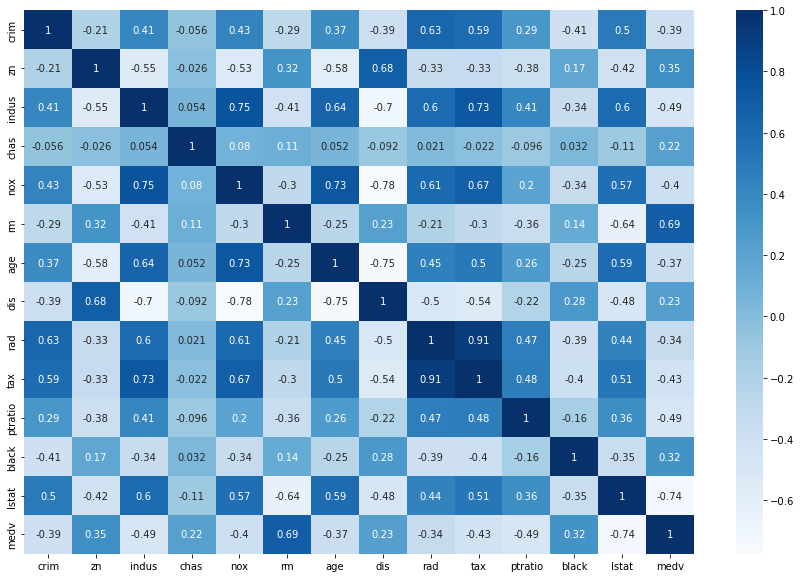

In [8]:
plt.figure(figsize=(15,10))
#Plot correlation heatmap of training data
train = pd.concat([X1_train, y1_train], axis=1)
cor = train.corr()
sns.heatmap(cor, annot=True, cmap='Blues')

Features rad and tax is highly correlated with each other, with abs(cor)=0.91 which is more than our threshold (0.8). Since tax has a stronger relationship with the target variable than rad, we will drop feature rad.

In [9]:
#Drop feature rad
X_test = X_test.drop('rad', axis=1)
X1_train = X1_train.drop('rad', axis=1)
X1_val = X1_val.drop('rad', axis=1)

## Model Training

In [10]:
#Convert test, train, and validation sets dataframe to NumPy array
X_train = X1_train.to_numpy()
y_train = y1_train.to_numpy()
X_val = X1_val.to_numpy()
y_val = y1_val.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
#Change the shape of y_test, y_train, and y_val
y_train = y_train.reshape(len(y_train),)
y_val = y_val.reshape(len(y_val),)
y_test = y_test.reshape(len(y_test),)

### Ridge Regression

In [11]:
#Create a list of alphas
alpha = [0.01, 0.1, 1, 10]
a={}
#Define the model
for i, j in enumerate(alpha):
    a['ridge{0}'.format(i)] = Ridge(alpha=j, random_state=100)
    #fit the model
    a['ridge{0}'.format(i)].fit(X_train, y_train)
    #get prediction
    y_pred = a['ridge{0}'.format(i)].predict(X_val)
    #find rmse
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f'Alpha = {j}, RMSE = {rmse}')

Alpha = 0.01, RMSE = 4.707270181937095
Alpha = 0.1, RMSE = 4.708725237620482
Alpha = 1, RMSE = 4.729307574634242
Alpha = 10, RMSE = 4.788268575978064


According to the RMSE of each model, the best model is Ridge with alpha=0.01. The model achieved the lowest RMSE (~4.707).

In [12]:
a

{'ridge0': Ridge(alpha=0.01, random_state=100),
 'ridge1': Ridge(alpha=0.1, random_state=100),
 'ridge2': Ridge(alpha=1, random_state=100),
 'ridge3': Ridge(alpha=10, random_state=100)}

Find the coefficients of all features of the best model.

In [13]:
#assign ridge with alpha=0.01 to best_ridge
best_ridge = a['ridge0']
coef = pd.DataFrame({'feature':['intercept'] + X1_train.columns.to_list(),
                       'coef': [best_ridge.intercept_] + list(best_ridge.coef_)})
coef

,feature,coef
0,intercept,29.092455
1,crim,-0.022028
2,zn,0.036825
3,indus,-0.103947
4,chas,3.811080
5,nox,-13.338335
6,rm,3.788073
7,age,-0.011130
8,dis,-1.523664
9,tax,0.001845


Interpretation:
- The regression coefficient for nox (nitric oxides concentration) is -13.338335. Each additional nitric oxides concentration is connected with a decrease of 13.338335 on mdev (median value of owner occupied-homes in 1000 dollars).
- The intercept coefficient is 29.092455. This means, if the other features have 0 coefficients, the median value of owner occupied-homes is 290924.55 dollars.


Visualize the residuals

Text(0, 0.5, 'Residuals')

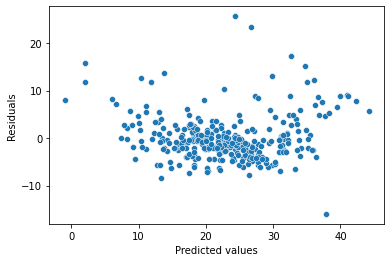

In [14]:
#Predict the train data
y_pred_train = best_ridge.predict(X_train)
#Calculate the residuals
ridge_residual = y_train - y_pred_train
#Scatter plot for residuals and predicted values
sns.scatterplot(x=y_pred_train, y=ridge_residual)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

The residuals are randomly dispersed.

### Lasso

In [15]:
#Create a list of alphas
alpha = [0.01, 0.1, 1, 10]
b={}
for i, j in enumerate(alpha):
    #Define the model
    b['lasso{0}'.format(i)] = Lasso(alpha=j, random_state=100)
    #fit the model
    b['lasso{0}'.format(i)].fit(X_train, y_train)
    #get prediction
    y_pred = b['lasso{0}'.format(i)].predict(X_val)
    #find rmse
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f'Alpha = {j}, RMSE = {rmse}')

Alpha = 0.01, RMSE = 4.71381105666119
Alpha = 0.1, RMSE = 4.799803063582563
Alpha = 1, RMSE = 5.346178659482137
Alpha = 10, RMSE = 6.182374186651091


According to the RMSE of each model, the best model is Lasso with alpha=0.01. The model achieved the lowest RMSE (~4.71).

In [16]:
b

{'lasso0': Lasso(alpha=0.01, random_state=100),
 'lasso1': Lasso(alpha=0.1, random_state=100),
 'lasso2': Lasso(alpha=1, random_state=100),
 'lasso3': Lasso(alpha=10, random_state=100)}

Find the coefficients of all features of the best model.

In [17]:
#assign lasso with alpha=0.01 to best_lasso
best_lasso = b['lasso0']
coef1 = pd.DataFrame({'feature':['intercept'] + X1_train.columns.to_list(),
                       'coef': [best_lasso.intercept_] + list(best_lasso.coef_)})
coef1

,feature,coef
0,intercept,27.273101
1,crim,-0.021125
2,zn,0.037546
3,indus,-0.112899
4,chas,3.630448
5,nox,-10.143013
6,rm,3.770858
7,age,-0.013521
8,dis,-1.470730
9,tax,0.001162


Interpretation:
- The lasso regression coefficient for rm (average number of rooms per dwelling) is 3.770858. Each additional average number of rooms is connected with an increase of 3.770858 on mdev (median value of owner occupied-homes in 1000 dollars).
- The intercept coefficient is 27.273101. This means, if the other features have 0 coefficients, the median value of owner occupied-homes is 272731.01 dollars.

Visualize the residuals

Text(0, 0.5, 'Residuals')

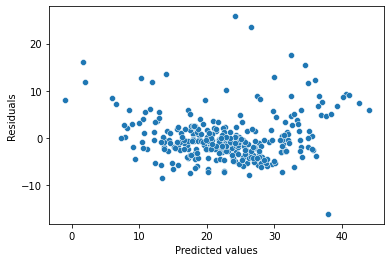

In [18]:
#Predict the train data
y_pred_train = best_lasso.predict(X_train)
#Calculate the residuals
lasso_residual = y_train - y_pred_train
#Scatter plot for residuals and predicted values
sns.scatterplot(x=y_pred_train, y=lasso_residual)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

The residuals are randomly dispersed.

## Model Evaluation

### Ridge
Training error

In [19]:
#Get predictions of train data
y_pred_train_ridge = best_ridge.predict(X_train)
#Calculate RMSE, MAE, and MAPE
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
train_mae_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
train_mape_ridge = mean_absolute_percentage_error(y_train, y_pred_train_ridge)
print('Train RMSE =', train_rmse_ridge, '\nTrain MAE =', train_mae_ridge, '\nTrain MAPE =', train_mape_ridge)

Train RMSE = 4.770618624276189 
Train MAE = 3.3201347871517433 
Train MAPE = 0.16314810523893444


Testing error

In [20]:
#Get predictions of test data
y_pred_test_ridge = best_ridge.predict(X_test)
#Calculate RMSE, MAE, and MAPE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
test_mae = mean_absolute_error(y_test, y_pred_test_ridge)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test_ridge)
print('Test RMSE =', test_rmse, '\nTest MAE =', test_mae, '\nTest MAPE =', test_mape)

Test RMSE = 5.081167612410762 
Test MAE = 3.4479843621130106 
Test MAPE = 0.17996407993917665


Interpretation:
- RMSE = 5.081167612410762 means the standard deviation of residual errors is 5.081167612410762.
- MAE is the average of absolute value of residual errors. MAE = 3.4479843621130106 indicates that, on average, the difference between the model's prediction and the actual data is 3.4479843621130106.
- MAPE is the absolute percentage of how far the predicted value are off from the actual value on average. MAPE = 0.17996407993917665 indicates that, on average, the difference between the model's prediction and the actual data is 17.996407993917665 percent of the actual data.

### Lasso
Training error

In [21]:
#Get predictions of train data
y_pred_train = best_lasso.predict(X_train)
#Calculate RMSE, MAE, and MAPE
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae_lasso = mean_absolute_error(y_train, y_pred_train)
train_mape_lasso = mean_absolute_percentage_error(y_train, y_pred_train)
print('Train RMSE =', train_rmse_lasso, '\nTrain MAE =', train_mae_lasso, '\nTrain MAPE =', train_mape_lasso)

Train RMSE = 4.774384034749898 
Train MAE = 3.312788744301565 
Train MAPE = 0.16293301149496656


Testing error

In [22]:
#Get predictions of test data
y_pred_test_lasso = best_lasso.predict(X_test)
#Calculate RMSE, MAE, and MAPE
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
test_mae_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
test_mape_lasso = mean_absolute_percentage_error(y_test, y_pred_test_lasso)
print('Test RMSE =', test_rmse_lasso, '\nTest MAE =', test_mae_lasso, '\nTest MAPE =', test_mape_lasso)

Test RMSE = 5.098655587375542 
Test MAE = 3.4577345266213184 
Test MAPE = 0.18070869179224597


Interpretation:
- RMSE = 5.098655587375542 means the standard deviation of residual errors is 5.098655587375542.
-  MAE = 3.4577345266213184 indicates that, on average, the difference between the model's prediction and the actual data is 3.4577345266213184.
- MAPE = 0.18070869179224597 indicates that, on average, the difference between the model's prediction and the actual data is 18.070869179224597 percent of the actual data.